In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt 


In [4]:
import warnings

In [5]:
df = pd.read_csv("bank.csv")

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.index

RangeIndex(start=0, stop=4521, step=1)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [12]:
unemployed_counts = df.job.value_counts().loc['unemployed']

In [13]:
services_counts = df.job.value_counts().loc['services']

In [14]:
management_counts = df.job.value_counts().loc['management']

In [15]:
blue_collar_counts = df.job.value_counts().loc['blue-collar']

In [16]:
self_employed_counts = (df.job == 'self-employed').sum()

In [17]:
technician_counts = (df.job == 'technician').sum()

In [18]:
entrepreneur_counts = (df.job == 'entrepreneur').sum()

In [19]:
admin_counts = (df.job == 'admin.').sum()

In [20]:
student_counts = (df.job == 'student').sum()

In [21]:
housemaid_counts = (df.job == 'housemaid').sum()

In [22]:
retired_counts = (df.job =='retired').sum()

In [23]:
unknown_counts = (df.job == 'unknown').sum()

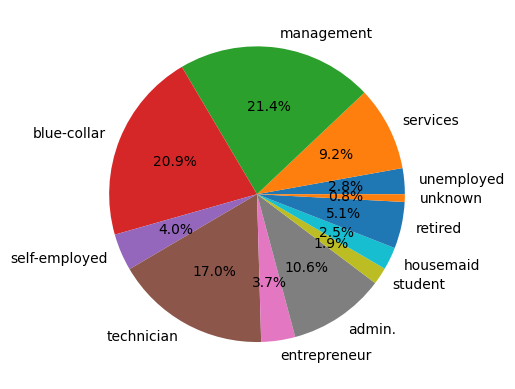

In [24]:
plt.pie([unemployed_counts,services_counts,management_counts,blue_collar_counts,self_employed_counts,technician_counts,entrepreneur_counts,admin_counts,student_counts,housemaid_counts,retired_counts,unknown_counts],labels = ['unemployed','services','management','blue-collar','self-employed','technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'],autopct = '%.1f%%')
plt.show()

In [25]:
df.marital.unique()


array(['married', 'single', 'divorced'], dtype=object)

In [26]:
married_count = df.marital.value_counts().loc['married']

In [27]:
single_counts = (df.marital == 'single').sum()


In [28]:
divorced_counts = (df.marital == 'divorced').sum()

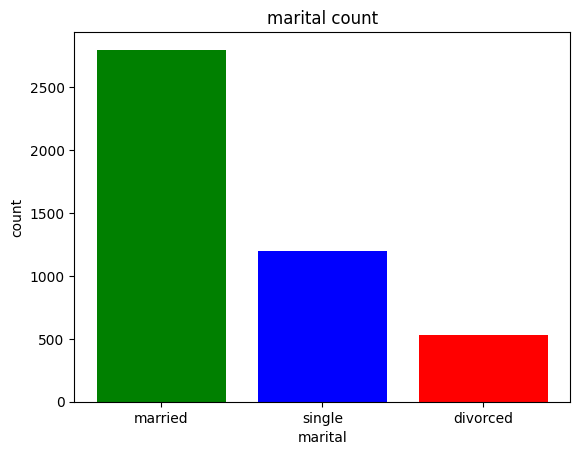

In [29]:
plt.bar(['married','single','divorced'],[married_count,single_counts,divorced_counts],color = ['g','b','r'])
plt.xlabel ('marital')
plt.ylabel('count')
plt.title('marital count')
plt.show()

In [30]:
df.age.idxmax()

3311

In [31]:
df.loc[[df.age.idxmax()]]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3311,87,retired,married,primary,no,230,no,no,cellular,30,oct,144,1,-1,0,unknown,yes


In [32]:
df.age.idxmin()

503

In [33]:
df.loc[[df.age.idxmin()]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
503,19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes


In [34]:
((df.age <= 60) & (df.job == 'unemployed')).sum()

128

In [35]:
((df.marital == 'divorced') & (df.job == 'unemployed')).sum()

22

In [36]:
((df.marital == 'divorced') & (df.job == 'services')).sum()

62

In [37]:
((df.marital == 'divorced') & (df.job == 'management')).sum()

119

In [38]:
((df.marital == 'divorced')&(df.job == 'blue-collar')).sum()

79

In [39]:

((df.marital == 'divorced') & (df.job == 'self-employed')).sum()

15

In [40]:
((df.marital == 'divorced') & (df.job == 'technician')).sum()

89

In [41]:
((df.marital == 'divorced') & (df.job == 'entrepreneur')).sum()

16

In [42]:




((df.marital == 'divorced') & (df.job == 'admin.')).sum()

69

In [43]:
((df.marital == 'divorced') & (df.job == 'student')).sum() 

0

In [44]:
((df.marital == 'divorced') & (df.job == 'housemaid')).sum()

13

In [45]:
((df.marital == 'divorced') & (df.job == 'retired')).sum()

43

In [46]:
((df.marital == 'divorced') & (df.job == 'unknown')).sum()

1

In [47]:
((df.job == 'student') & (df.marital == 'maried')).sum()

0

In [48]:
df.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [49]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [50]:
df.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [51]:
primary_count = (df.education == 'primary' ).sum()

In [52]:
secondary_count = (df.education == 'secondary').sum()

In [53]:
tertiary_count = (df.education == 'tertiary ').sum()

In [54]:
unknown_count = (df.education == 'unknown').sum()

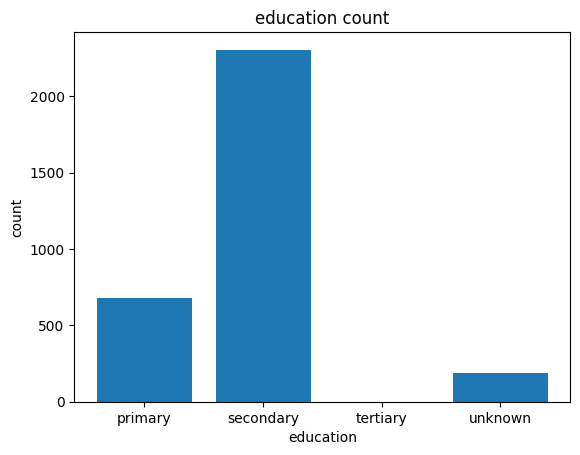

In [55]:
plt.bar(['primary','secondary','tertiary','unknown'],[primary_count,secondary_count,tertiary_count,unknown_count])
plt.xlabel ('education')
plt.ylabel ('count')
plt.title('education count')
plt.show()

In [56]:
df.age.unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84])

In [57]:
young_adults = ((df.age >= 19 ) & (df.age <= 39)).sum()

In [58]:
middle_aged_adults = ((df.age >= 40) & (df.age <= 59)).sum()

In [59]:
old_adults =  ((df.age >= 60) & (df.age <= 90 ) ).sum()

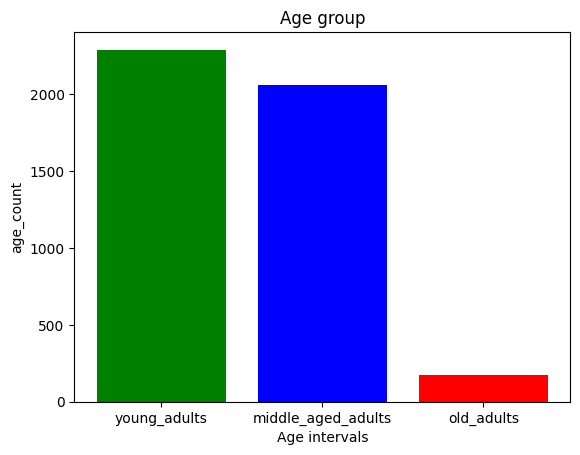

In [60]:
plt.bar(['young_adults','middle_aged_adults','old_adults'],[young_adults,middle_aged_adults,old_adults],color=['g','b','r'])
plt.xlabel ( 'Age intervals')
plt.ylabel ('age_count')
plt.title ('Age group')
plt.show()

In [61]:
df.housing.unique()

array(['no', 'yes'], dtype=object)

In [62]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [63]:
((df.housing == 'yes') & (df.loan == 'yes')).sum()

406

In [64]:
((df.housing == 'no') & (df.loan == 'yes')).sum()

285

In [65]:
((df.housing == 'yes') & (df.loan == 'no')).sum()

2153

In [66]:
((df.housing == 'no') & (df.loan == 'no')).sum()

1677

In [67]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [68]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [69]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [70]:
(df.balance < 0).sum()


366

In [71]:
(df.balance > 0).sum()

3798

In [72]:
(df.balance == 0).sum()

357

In [73]:
df.balance.max()

71188

In [74]:
df.balance.min()

-3313

In [75]:
df.balance.idxmax()

3700

In [76]:
df.iloc[[df.balance.idxmax()]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3700,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no


In [77]:
df.balance.idxmin()

4517

In [78]:
df.iloc[[df.balance.idxmin()]]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


In [79]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [80]:
df.lone_only = df[df.loan == 'yes']

/var/folders/wr/3ggnz13s5g5ddpms_zyn_7xr0000gn/T/ipykernel_69668/728785547.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.lone_only = df[df.loan == 'yes']


In [81]:
df.lone_only

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
14,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
15,40,management,married,tertiary,no,194,no,yes,cellular,29,aug,189,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4508,42,admin.,married,unknown,no,642,yes,yes,unknown,16,may,509,2,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


In [106]:
def loan (l):
    if l == "yes":
        return 'ram'
    else:
         return 'hello'

In [107]:
df['Loan']=df.loan.apply(loan)

In [108]:
df.Loan.value_counts().loc['ram']

691

In [111]:
df.Loan.value_counts().loc['hello']

3830

In [110]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [96]:
df['loan']

0        no
1       yes
2        no
3       yes
4        no
       ... 
4516     no
4517    yes
4518     no
4519     no
4520    yes
Name: loan, Length: 4521, dtype: object

In [113]:
df.loan.index

RangeIndex(start=0, stop=4521, step=1)

In [114]:
df.loan.value_counts().loc['no']

3830

df
